## Clothes pins and entropic interactions
<p/>
The entropic force acting on a system is a force resulting from the entire system's thermodynamical tendencey tworda increasing entropy [Wikipedia]. It can be so strong that it introduces phase transitions from a liquid to a solid. The clothes pins model corresponds to a one dimensional hard disks model.
<p/>
## Random clothes pins (one-dimensional hard spheres)

In [4]:
#direct_pins.py

import random

N = 15
L = 10.0
sigma = 0.1
n_configs = 1
for config in range(n_configs):
    x = []
    while len(x) < N:
        x.append(random.uniform(sigma, L - sigma))
        for k in range(len(x) - 1):
            if abs(x[-1] - x[k]) < 2.0 * sigma:
                x = []
                break
    print (x)


[2.5187692974925944, 6.022684714208877, 7.835916200884941, 5.49821225997367, 7.139970206977147, 2.9228242980461, 0.9356037192602737, 0.7159636675046728, 3.995852336558072, 9.273694447819613, 6.934691794626352, 6.38272929331373, 9.498051896098898, 9.790023212113068, 1.8598810606578065]


We use the random clothes pins model and place pins randomly on positions $ x_0, x_1, x_2, \cdots, x_{N-1} $ and so on. Each time we check that there are no overlaps and if there is, we use the tabula rasa rule and reject the configuration completely. This is what allows us to sample configurations $ x_0, \cdots, x_{N-1} $ with probability $ \pi = \text{ constant} $ if the configuration is legal and $ \pi = 0 $ if it is not.
<p/>
$$ \pi(x_0, \cdots, x_{N-1}) = \left \{ \begin{array}[l]~ 1 \text{ if legal} \\  0 \text{ otherwise} \end{array} \right . \quad \quad \sigma < x_i < L-\sigma $$

We can introduce a trick into our algorithm that will make the program run more efficiently without changing the probabilities calculated or violating the tabula rasa rule. If we sort the configuration vector such that $ x_0 < x_1 < ... $ then all we need to do is check that the last addition to the vector is at least 2$\sigma$ away from the previous addition instead of having to check the last entry against all previous entries.

In [6]:
#direct_pins_improved.py

import random

N = 15
L = 10.0
sigma = 0.075
n_configs = 100
for config in range(n_configs):
    while True:
        x = [random.uniform(sigma, L - sigma) for k in range(N)]
        x.sort()
        min_dist = min(x[k + 1] - x[k] for k in range(N - 1))
        if min_dist > 2.0 * sigma:
            print (x)
            break


[0.635664044399273, 1.1207711418523767, 1.2708840131556145, 2.065685653246446, 2.897012404092683, 4.1723954253465285, 4.48478874789711, 4.9804633228447965, 5.744236661493269, 6.918547501905942, 7.686170933967599, 8.116773623928708, 9.191458024231363, 9.488761803529826, 9.826541069436896]
[0.12493973843846973, 1.131170291420968, 2.5409847382907342, 3.5750736057050894, 3.789747699030344, 4.329373584695772, 5.129300270369082, 6.306625179292556, 7.670474455508672, 7.880139696303886, 8.157726760217006, 8.476483778582223, 8.871665293240333, 9.476842022835175, 9.83180039220748]
[0.5802627136799678, 0.7486409059575075, 0.9322990984797644, 1.1580131224232162, 2.440460972697862, 2.679680478430138, 3.330748134693721, 3.9404031802418555, 4.235878131909796, 5.587918158455152, 6.069131773823392, 6.3643218461173126, 7.373861785370441, 8.170790449199462, 8.562605889194927]
[0.7401464828071188, 1.0917411635966259, 1.8514473614229598, 2.1059126564619413, 2.4895655518991213, 3.1954240676732675, 3.9781600

The output of the program for 5 pairs of radius $\sigma = 0.075 $ on a line of length 1 (75% to be occupied by clothespins) shows a line for each accepted configuration. The positions shown are the center of the clothespin. It takes about 500 trials for each accepted configuration. For $N=10$ we would see that we get an acceptance of 1 out of 500,000, and for $N=15$ it will be around 500,000,000. Because of such high rejection rates, we need to use a different algorithm. The way to analyze this data is to  do a histogram of all the x positions in this table.

c:\users\jgambini\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


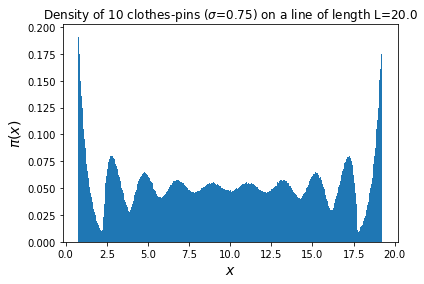

In [43]:
# direct_pins_noreject.py
import random, pylab

N = 10
L = 20.0
sigma = 0.75
n_runs = 500000
data = []
for run in range(n_runs):
    y = [random.uniform(0.0, L - 2 * N * sigma) for k in range(N)]
    y.sort()
    data += [y[i] + (2 * i + 1) * sigma for i in range(N)]
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$\pi(x)$', fontsize=14)
pylab.title('Density of %i clothes-pins ($\sigma$=%s) on a line of length L=%s' % (N, sigma, L))
pylab.hist(data, bins=400, normed=True)
pylab.savefig('plot-direct_pins_noreject.png')
pylab.show()


# The Asakura - 0osawa interaction
<p/>
<img style="float:right;margin:0em 1em 1em 1em" src="W3/halo.png"/>
The oscilatory effect of the random data is what Asakura and Oosawa found in 1954 in their famous paper. When drawing configurations of pins, we must relize that there are two types of excluded regions.
<p/>
The first type is the core, the space occupied by the clothespin itself. Relize that the position of the pin is given by its center and this creates a second type of excluded region that we call the halo. The center of another particle can pentrate neither into the halo nor into the core. The poles in the clothespin model also have a halo of size $ x > \sigma $ units away from the edges of the domain.
<p/>
The core area of out N pairs is fixed. It is equal to 2N$\sigma$. The total area of the halo however is not fixed. It the pin is far away from either pole the halo is equal to $4\sigma$. If the pin is against one of the poles the total halo area is equal to $2\sigma$. It follows that the configurations with the pin towards the poles has a greater area for more pins to be put and less chance of a tabula rasa wipeout. One  might say that the particles are attracted to the boundries.
<p/>
Now lets see if the halo principle produces interactions between particles. We will consider a line of length L with a pole to the left and a pole to the right and two pins with radius $\sigma$ so that the core area is $2\sigma$. Can the halo principle fully describe the density histogram we saw earlier? No. The halo principle nicely describes the increase of density close to the boundries but it cannot account for the intricate oscillations of the profile. Later we will derive an analytical formula which exactly describes the density profile that we obtained from numerical simulations.
<p/>
The halo picture although it is approximate, applies in any dimension and explains why we obtained an inhomogeneous density profilee for the 4 hard disks in a box. For a disk of radius $\sigma$ there is a ring of radius $\sigma$ that forms the halo. No other center of disks can penetrate into the halo or the core area but note that the halo itself can penetrate into another halo or into another core area.


<img style="float:right;margin:0em 1em 1em 1em" src="W3/3-2-disk-halo-configurations.png"/>
Here we see three configurations of two disks in a box. In conffigurations c the two disks are in the corners and the available space for other particles is much larger than for configurations b, but configuration a has the least accessible space for other particles.
<p/>
If we have two particles already in configurations c, we have much more available space for other particles and a lower chance to undergo tabula rasa wipe-outs. This means we expect a higher density in the corners of the box than in the center and this is exactly what was observed in last weeks homework.
<p/>
Consider configuration b, the two particles attract each other. Configuration b has more free space than a so there is a higher probability for closely placed disks in a tabula rasa derived configuration scheme.
<p/>
In the one-dimensional clothes-pin model, the oscillations that we see decay at the exponential rate of a few clothes-pins. This means that the boundry effects and the pair correlations decay on a scale of a few $\sigma$s and this implies that the Asakura - Oosawa interaction leads to local modulations of densities and pair correlations. On long length scales the system is completely homogeneous and this is what defines the liquid state.
<p/>
The clothes-pin model is an example of a very general class of physical systems with short range interactions. Powerful mathematical theorems exclude the possibility of a phase transition in systems with one spatial dimensions. This will be the subject of the next section.

# Asakura - Oosawa interaction: Physical Systems
<p/>
Lets start with a discussion of the two extremes: the close-packed limit and the dilute system considering systems with periodic boundary conditions.
<p/>
<table style="float:right;margin:0em 1em 1em 1em">
    <tr>
        <td><img src="W3/close-packed-limit.png"/></td>
    </tr>
    <tr>
        <td style="font-size:large;text-align:center">$ x_0, x_0 + 2\sigma, x_0 + 4\sigma, x_0 + 6\sigma, \cdots $</td>
    </tr>
    <tr>
        <td><img src="W3/hexagonal-packing.png"/></td>
    </tr>
    <tr>
        <td><img src="W3/loose-packing.png"/></td>
    </tr>
    <tr>
        <td style="font-size:large;text-align:center">$ \eta = 0.48 $</td>
    </tr>
    <tr>
        <td><img src="W3/dense-packing.png"/></td>
    </tr>
    <tr>
        <td style="font-size:large;text-align:center">$ \eta = 0.72 $</td>
    </tr>
</table>
In a one dimensional system, for example the random clothes-pin model, the close-packed limit (eta=1) is special. We have pins at $ x_0, x_0 + 2\sigma, x_0 + 4\sigma, \cdots $ and so on; even though, because of the periodic boundry conditions conditions, we do not know where $x_0$ is. We have positional long-range order in the system but, we also know and will prove, that for all densities lower then $\eta = 1$, the system is different, it is liquid like, like it is in a very low density limit.
<p/>
In two dimensions, that is for systems of hard disks, the close-packed density is equal to $\pi/2\sqrt{3}$:
<p/>
$$\eta_{close-packed} = \frac {\pi} {2\sqrt{3}} = 0.907$$
<p/>
and the close-packing configuration is hexagonal as shown in the picture.
<p/>
The mathematician Laszlo Fejes Toth proved in 1940 that no other configuration than the hexagonal packing existed at this density $\pi/2\sqrt{3}$ so we are sure to have long range positional and orientational order in this system at close-packing density. There are no other mathematical results about this system besides the fact that at very small density the system is liquid. To find out what is going on at intermediate densities we have to resort to numerical simulations: Markov Chain Monte Carlo simulations and Molecular Dynamics simulations allow us to sample this.
<p/>
For example, here you see a system of 256 disks at density $\eta = 0.48$ with periodic boundry conditions in x and y. Here, the Asakura-Oosawa depletion interaction is at work, and it produces some unconnected local arrangments of disks that resemble the close-packing limit at density $\eta = 0.97$. Look at the highlighted spots in the picture.
<p/>
At higher density the picture changes. It is qualitativly different. A phase transition has taken place. The discovery of this phase transition from the $\eta = 0.48$ configuration to the denser $\eta = 0.72$ phase is a computational achievement and it has been observed in many experiments  but it is not backed by mathematical theorems.
<p/>
<div style="margin:0em 4em">
Alder and Wainwright 1962
<p/>
Discovered by Computation (event-driven MD)
</div>
<p/>
This transition at a finite density, below close-packing, takes place in two dimensions and also in three for hard spheres. The existence of such a transition was first suggested in theoretical works by Kirkwood and Monroe in 1941.




# Week 3 Tutorial
<p/>
The clothes-pin model is a prime example of the Asakura-Oosawa depletion interaction which is of great importance for macromolecules, polymers, blood cells, and many other systems.
<p/>
The random clothes-pin model can be simulated very efficiently. We saw in the lecture a nieve algorithm but here in the tutorial we will show a providential method that allows us to simulate millions of clothes-pin on a line without rejection and without any effort. This fantastic algorithm will show us the way to solve the model analytically. We will show how to compute the partition function, how to sum up the virial expansion, and how to prove that this system in fact does not have a phase transition.
<p/>
Later, Vivian will investigate the relationsship betweeen pins on a line with walls or poles and pins with periodic boundary conditions on a ring. He will characterize the correlation in the system and show that they are short range and that they characterize a liquid.


<b>Random clothes-pins (One-dimensional hard spheres)</b>
<p/>
Consider N clothes-pins of width $2\sigma$ on a line with boundroes $x=0$ and $x=L$. Randomly placing the clothes-pins on the line and using the tabula-rasa rule we achieve a flat probability distribution for the legal configurations. We sample N pin configurations with a distribution:
<p/>
$$\pi(x_0, \cdots, x_{N-1}) = \left \{ \begin{array}[ll] ~\text{ 1 if legal} \\ \text{ 0 if not legal} \end{array} \right . $$
<p/>
We know have a partition of the configurations space where all (legal) configurations have the same energy, E=0. This is in agreement with the equiprobability principle. Our pins are, in one dimension, what disks and spheres are in two and three dimesions.

In [6]:
import random

N = 15
L = 10.0
sigma = 0.1
n_configs = 5
for config in range(n_configs):
    x = []
    while len(x) < N:
        x.append(random.uniform(sigma, L - sigma))
        for k in range(len(x) - 1):
            if abs(x[-1] - x[k]) < 2.0 * sigma:
                x = []
                break
    print (x)


[8.975228293274393, 4.1982983225092525, 4.56033685539723, 7.318274448934946, 7.886851716668624, 6.770982643151259, 2.7744255871694246, 6.041925612339692, 8.535178484512448, 5.491009225836192, 1.1414401241908807, 9.835328089339061, 8.181999032767655, 7.65569936613793, 6.5091138083314855]
[7.0534938587412555, 6.637964093299213, 7.980703009916327, 4.553409630579775, 2.9346328663340593, 6.327531513888971, 7.70675574058324, 3.361838254766461, 2.091240747983026, 0.424616462816647, 8.674626691091564, 1.4395932933694926, 1.7260426553826658, 0.7018962146710466, 9.879443431524832]
[7.919282214975881, 8.203667798114967, 9.506650035743435, 0.1686010423758808, 1.723451124411568, 2.0777107920249254, 8.62640968640124, 5.083440552038554, 5.729621313791232, 6.668018467973853, 1.3492941924250355, 0.5540830612675038, 2.4673941610386576, 4.761348409880054, 7.6773439308705385]
[4.996139477704816, 7.249783351114462, 6.2981116158259765, 0.792513044204363, 3.8750950457148443, 6.605384727307701, 2.482028467320

We've learned that in a configuration space of legal and illegal configurations, the regions of illegal configurations are like the holes in swiss cheese. For the cloths-pin problem, we can actually remove the holes from the cheese. We are able to sample N pin configurations without producing any illegal configurations along the way. This gives us a rejection rate of exactly zero.
<p/>
<img style="float:right;margin:0em 1em 1em 1em" src="W3/deflation_corrected_small_white.png"/>
To illustrate this lets consider 5 clothes-pins on a washing line. The first pin cannot be placed within the halo of the left wall. Likewise, the second pin cannot be placed within a distance of $2\sigma$ from the first pin's center, and so on for the other pins. Finally, no pin can be placed within the halo of the right wall. Having identified these regions, we can know deflate the washing line by cutting out these regions privided we focus now on the pin centers. We will now identify the pin centers as $y_0, y_1, \cdots, $y_{N-1}:
<p/>
$$ y_i = x_i - 2(i+1) \sigma $$
<p/>
We can now randomly distribute the pin centers of the shorter line then inflate the washing line back to the longer washing line:
<p/>
$$ x_i = y_i + 2(i+1)\sigma $$



In [5]:
import random

N = 10
L = 20.0
sigma = 0.75
n_runs = 5
for run in range(n_runs):
    y = [random.uniform(0.0, L - 2 * N * sigma) for k in range(N)]
    y.sort()
    print ([y[i] + (2 * i + 1) * sigma for i in range(N)])


[1.3321735358991298, 2.888234715733264, 5.049448490389695, 6.7777170785046135, 8.580337904956991, 10.406667230816868, 11.996875945632608, 15.16953677603925, 17.142858026572338, 18.817644657383426]
[1.0789482118944687, 2.997322236270762, 5.141969627605631, 6.7268919125612205, 8.30466507602363, 9.812757918280797, 12.712356885130816, 15.291121434135295, 17.11691757519612, 18.649036146554856]
[1.7329730480137489, 3.2681660374400776, 4.8407522466011645, 6.759538997348024, 9.55177519585871, 11.425831147835204, 12.996226181700093, 15.014371987950396, 16.920527051911783, 18.644054078838245]
[0.9679490617493118, 3.716511046825769, 5.317014854990195, 7.24665047243575, 9.391861688628264, 11.375413106415458, 12.940424850808046, 15.422978790421158, 17.02152115992395, 19.028281529524705]
[0.9688601058612516, 2.506545220793634, 4.174152536228241, 5.68517056024249, 7.556632670651645, 9.633787575514479, 11.398465699780258, 14.223488298852585, 16.690503651833076, 18.72677522840413]


<b>Random clothes-pins (The exact solutions)</b>
<p/>
The  rejection free algorithm for the many-body interacting system is posible because we are able to compute the exact partition function of the systems:
<p/>
$$ Z(\eta) = \left \{ \begin{array}[ccc] ~\text{ number of legal } \\ \text{ configurations } \\ \text{ for density }\eta \end{array} \right \} $$
$$ = \int_0^{L-2N\sigma} dx_0 \cdots dx_{N-1} \cdot \pi(x_0, x_1, \cdots , x_{N-1}) $$
<p/>
where $\pi$ is, as usual, zero if there is an overlap and 1 if there is no overlap:
<p/>
$$ \pi(x_0, \cdots, x_{N-1}) = \left \{ \begin{array}[ll] ~\text{ 1 if legal } \\ \text{ 0 otherwise } \end{array} \right . $$
<p/>
In the program direct_pins_noreject.py there is an all important sorting step that can be expressed in the integral thusly:
<p/>
$$ Z(\eta) = N! \int_0^{L-2N\sigma} dx_0 \cdots dx_{N-1} \cdot \pi(x_0, \dots, x_{N-1}) \cdot \Theta(x_0, \dots , x_{N-1})$$
<p/>
where the theta function $\Theta$ selects betweeen the N factorial possible orderings of the pins' centers, the sorted one with $x_0 < x_1 < x_2 < \dots$:
<p/>
$$\Theta(x_0, \dots x_{N-1}) = \left \{ \begin{array}[ll] ~1 \text{ if } x_0 < x_1 < \dots < x_{N-1} \\ \text{0 otherwise } \end{array} \right . $$

We can now apply the deflation step and change the x variables to the y variables. We obtain the integral:
<p/>
$$ Z(\eta) = N! \int_0^{L-2N\sigma} dy_0 \cdots dy_{N-1} \cdot \Theta (y_0 \cdots y_{N-1}) $$
<p/>
where there is no longer an overlap condition but only the ordering of the y variables imposed by the theta function.
<p/>
Since the theta function picks out <u>one</u> of the N factorial pernutations of the integral, we can eliminate the N! and the theta function, compute the integral and get the final result for the partition function:
<p/>
$$ Z = \left \{ \begin{array}[ll] ~(L-2N\sigma)^N \text{ if } L > 2N\sigma \\ \text{ otherwise } 0 \end{array} \right . $$
<p/>
This allows us to compute the acceptance probability. The acceptance probability is the ratio of the volume of legal configurations to the volume of legal and illegal configurations.
<p/>
$$ \mathcal{P}_{accept}(\eta) = \frac {\left \{ \begin{matrix} ~\text{ number of legal configurations } \\ \text{ for density } \eta \end{matrix} \right \} } {\left \{ \begin{matrix} ~\text{ number of illegal and legal } \\ \text{ configurations } \end{matrix} \right \} } = \frac {Z(\eta)} {Z(0)} $$